In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
img_one = cv2.imread('DATA/dog_backpack.png')
img_one = cv2.cvtColor(img_one, cv2.COLOR_BGR2RGB)
# Water mark
img_two = cv2.imread('DATA/watermark_no_copy.png')
img_two = cv2.cvtColor(img_two, cv2.COLOR_BGR2RGB)

In [5]:
if img_one is None or img_two is None:
    print("Something didn't load correctly")
else: 
    print("Everything is fine!")

Everything is fine!


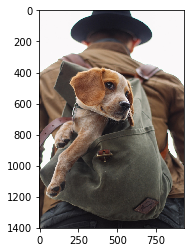

In [8]:
plt.imshow(img_one)

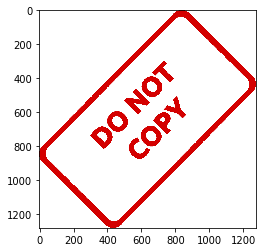

In [9]:
plt.imshow(img_two)

In [10]:
img_one.shape

(1401, 934, 3)

In [11]:
img_two.shape

(1280, 1277, 3)

In [14]:
# Blending images of the same size

In [15]:
img_one = cv2.resize(img_one, (1200, 1200))
img_two = cv2.resize(img_two, (1200, 1200))

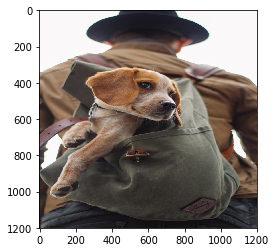

In [16]:
plt.imshow(img_one)

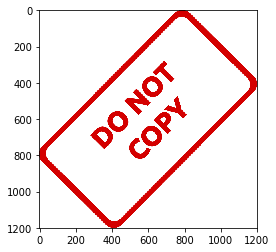

In [17]:
plt.imshow(img_two)

In [26]:
# addWeighted only in case of same images size
blended = cv2.addWeighted(src1=img_one, alpha=0.8, src2=img_two, beta=0.1, gamma=0)

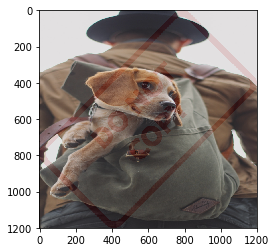

In [29]:
plt.imshow(blended)

In [30]:
# OVERLAY SMALL IMAGE ON TOP OF A LARGER IMAGE ( No Blending )
# Numpy reassignment

img_one = cv2.imread('DATA/dog_backpack.png')
img_one = cv2.cvtColor(img_one, cv2.COLOR_BGR2RGB)
# Water mark
img_two = cv2.imread('DATA/watermark_no_copy.png')
img_two = cv2.cvtColor(img_two, cv2.COLOR_BGR2RGB)


In [ ]:
img_two = cv2.resize(img_two, (600, 600))
plt.imshow(img_two)

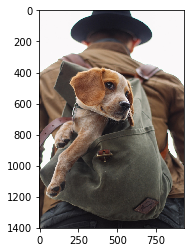

In [35]:
plt.imshow(img_one)

In [36]:
large_img = img_one
small_img = img_two

In [37]:
x_offset = 0
y_offset = 0

In [38]:
x_end = x_offset + small_img.shape[1] 
y_end = y_offset + small_img.shape[0]

In [39]:
large_img[y_offset: y_end, x_offset:x_end] = small_img

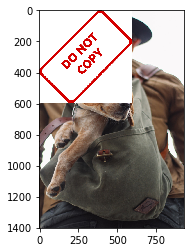

In [40]:
plt.imshow(large_img)

In [51]:
# Blending Part two
# BLEND TOGETHER IMAGES OF DIFFERENT SIZES

img_one = cv2.imread('DATA/dog_backpack.png')
img_one = cv2.cvtColor(img_one, cv2.COLOR_BGR2RGB)
# Water mark
img_two = cv2.imread('DATA/watermark_no_copy.png')
img_two = cv2.cvtColor(img_two, cv2.COLOR_BGR2RGB)

In [52]:
img_two = cv2.resize(img_two, (600, 600))

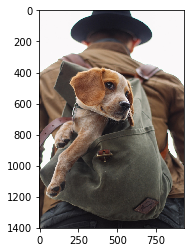

In [53]:
plt.imshow(img_one)

In [54]:
img_one.shape

(1401, 934, 3)

In [80]:
x_offset = 934 - 600
y_offset = 1401 - 600

In [81]:
rows, cols, channels = img_two.shape

In [82]:
rows

600

In [83]:
cols

600

In [84]:
channels

3

In [115]:
roi = img_one[y_offset: 1401, x_offset: 941]

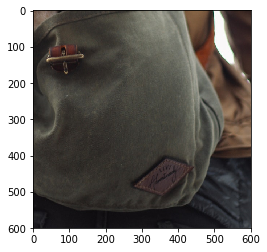

In [116]:
plt.imshow(roi) # The spot where we want to match our image

In [117]:
img2gray = cv2.cvtColor(img_two, cv2.COLOR_RGB2GRAY)

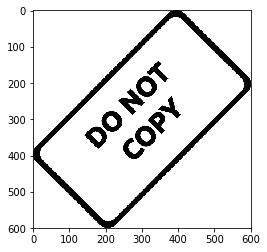

In [118]:
plt.imshow(img2gray, cmap='gray')

In [119]:
mask_inv = cv2.bitwise_not(img2gray)

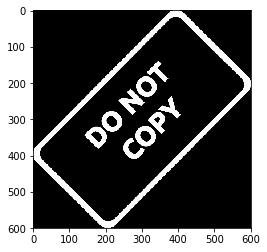

In [120]:
plt.imshow(mask_inv, cmap="gray")

In [121]:
mask_inv.shape

(600, 600)

In [122]:
white_background = np.full(img_two.shape, 255, dtype=np.uint8)

In [123]:
white_background.shape

(600, 600, 3)

In [124]:
bk = cv2.bitwise_or(white_background, white_background, mask=mask_inv)

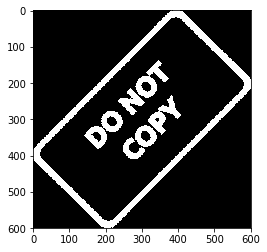

In [125]:
plt.imshow(bk)

In [126]:
bk.shape

(600, 600, 3)

In [127]:
fg = cv2.bitwise_or(img_two, img_two, mask=mask_inv)

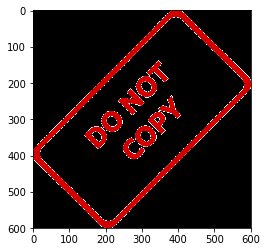

In [128]:
plt.imshow(fg)

In [129]:
final_roi = cv2.bitwise_or(roi, fg)

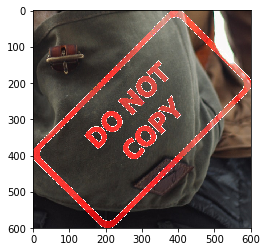

In [130]:
plt.imshow(final_roi)

In [131]:
large_img = img_one
small_img = final_roi

In [133]:
large_img[y_offset:y_offset + small_img.shape[0],x_offset:x_offset+small_img.shape[1]] = small_img

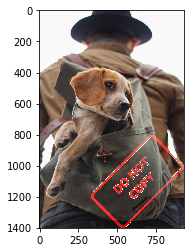

In [134]:
plt.imshow(large_img)